# My question is whether the distribution of the normal stats (Atk, Def) differs from that of the special stats (SpAtk, SpDef).
# I think an observational study is best fit to this, because we won't have to change any variables to figure out the answer.
# I will examine a sample of Pokemon from generations 1-6 using the Pokemon dataset hosted by Armand Gilles on GitHub.
# The link to that dataset is here: https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6
# The dataset does not contain information on how it was collected, but I can guess how they got the data.
# Since all of the data included is available within the Pokemon games it describes, I believe it was collected from the games directly.
# Since it covers generations 1-6, I believe that would be all games before the release of Pokemon Sun and Moon.

# Biases:
# This only includes generations 1-6, so data from other generations is missing.
# Mega versions and different genders of Pokemon are counted as additional Pokemon, with their stats counted additional times.

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pokemon_df = pd.read_csv("pokemon.csv")

pokemon_df = pokemon_df.rename(columns={
    "Attack": "Atk",
    "Defense": "Def",
    "Sp. Atk": "SpAtk",
    "Sp. Def": "SpDef"
})

In [90]:
print(pokemon_df['Atk'].describe().to_string(header=False)) # Chop off name and dtype
atk_IQR = pokemon_df['Atk'].quantile(0.75) - pokemon_df['Atk'].quantile(0.25)
print("IQR:    ", atk_IQR)

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
IQR:     45.0


In [91]:
print(pokemon_df['Def'].describe().to_string(header=False)) # Chop off name and dtype
def_IQR = pokemon_df['Def'].quantile(0.75) - pokemon_df['Def'].quantile(0.25)
print("IQR:    ", def_IQR)

count    800.000000
mean      73.842500
std       31.183501
min        5.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      230.000000
IQR:     40.0


In [92]:
print(pokemon_df['SpAtk'].describe().to_string(header=False)) # Chop off name and dtype
spatk_IQR = pokemon_df['SpAtk'].quantile(0.75) - pokemon_df['SpAtk'].quantile(0.25)
print("IQR:    ", spatk_IQR)

count    800.000000
mean      72.820000
std       32.722294
min       10.000000
25%       49.750000
50%       65.000000
75%       95.000000
max      194.000000
IQR:     45.25


In [93]:
print(pokemon_df['SpDef'].describe().to_string(header=False)) # Chop off name and dtype
spdef_IQR = pokemon_df['SpDef'].quantile(0.75) - pokemon_df['SpDef'].quantile(0.25)
print("IQR:    ", spdef_IQR)

count    800.000000
mean      71.902500
std       27.828916
min       20.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      230.000000
IQR:     40.0


# Already, these 5-number summaries tell us a lot about the stats I want to analyze.
# Atk is notably higher than the other 3 stats in both mean and median.
# The maximum values are higher for the defensive stats, while the minimums are higher for the special stats.
# The standard deviation for SpDef is pretty low, probably because it is the most neglected stat.
# Somehow the Q1 for SpAtk is 49.75? I can't think of an explanation even given the fact that we have an even number of Pokemon (800).
# All values are integers, and the mean of 2 integers is always a multiple of 0.5.

/tmp/ipykernel_121/4152972923.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([str(abs(int(y))) for y in yticks])


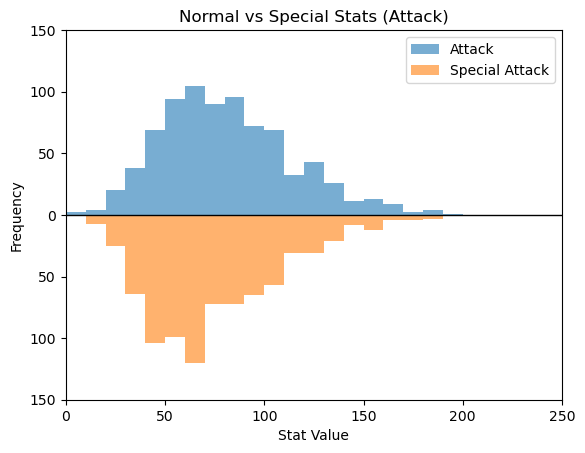

In [94]:
# Bins covering the full range
bins = np.linspace(0, 250, 26)

# Compute histograms
atk_counts, edges = np.histogram(pokemon_df["Atk"], bins=bins)
spatk_counts, _   = np.histogram(pokemon_df["SpAtk"], bins=bins)

# Plot Atk
plt.bar(edges[:-1], atk_counts, width=np.diff(edges), align="edge",
        alpha=0.6, label="Attack")

# Plot SpAtk (upside-down)
plt.bar(edges[:-1], -spatk_counts, width=np.diff(edges), align="edge",
        alpha=0.6, label="Special Attack")

# Zero reference line
plt.axhline(0, color="black", linewidth=1)

# Mirror the y-axis labels
yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([str(abs(int(y))) for y in yticks])

# Labels and formatting
plt.xlabel("Stat Value")
plt.ylabel("Frequency")
plt.title("Normal vs Special Stats (Attack)")
plt.legend()

plt.xlim(0, 250)
plt.ylim(-150, 150)
plt.show()

/tmp/ipykernel_121/1608794811.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([str(abs(int(y))) for y in yticks])


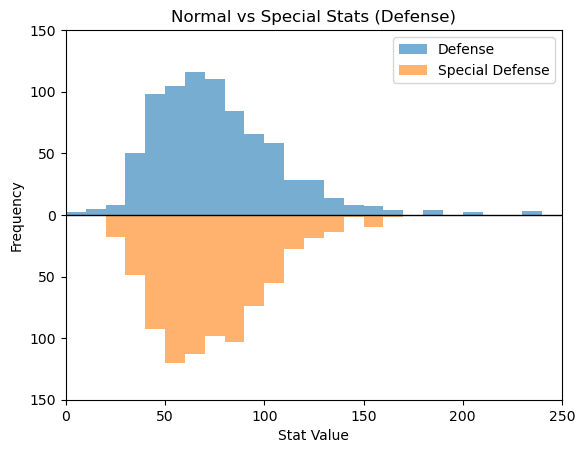

In [95]:
# Bins covering the full range
bins = np.linspace(0, 250, 26)

# Compute histograms
def_counts, edges = np.histogram(pokemon_df["Def"], bins=bins)
spdef_counts, _   = np.histogram(pokemon_df["SpDef"], bins=bins)

# Plot Def
plt.bar(edges[:-1], def_counts, width=np.diff(edges), align="edge",
        alpha=0.6, label="Defense")

# Plot SpDef (upside-down)
plt.bar(edges[:-1], -spdef_counts, width=np.diff(edges), align="edge",
        alpha=0.6, label="Special Defense")

# Zero reference line
plt.axhline(0, color="black", linewidth=1)

# Mirror the y-axis labels
yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([str(abs(int(y))) for y in yticks])

# Labels and formatting
plt.xlabel("Stat Value")
plt.ylabel("Frequency")
plt.title("Normal vs Special Stats (Defense)")
plt.legend()

plt.xlim(0, 250)
plt.ylim(-150, 150)
plt.show()

# All stats appear to be right-skewed, but the special stats appear to have modes further to the left than the normal stats do.
# More Pokemon appear to be clustered around the mode of the special stats, with fewer outliers far above the norm (especially with SpDef).
# The defensive stats, in general, have fewer outliers and more Pokemon clustered around the mode.
# However, their maximums do go higher, and some Pokemon can be found in the 195-230 range.

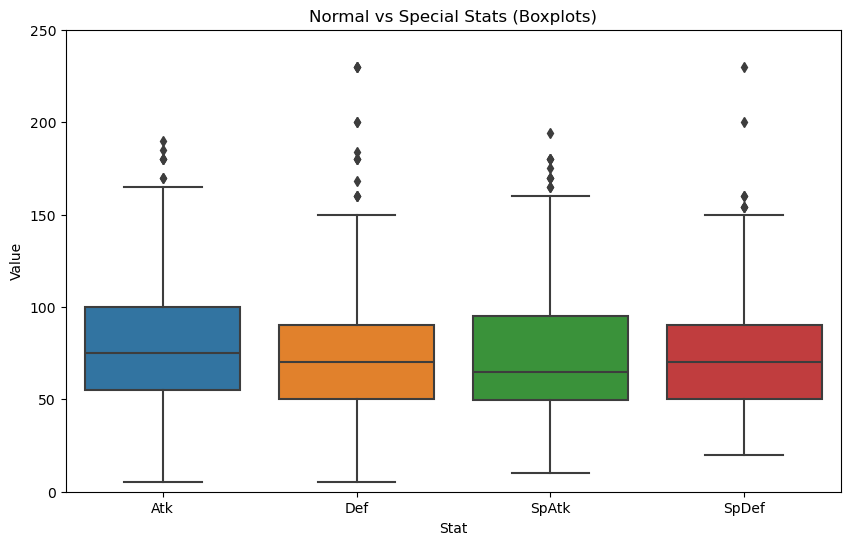

In [96]:
# Melt the dataframe to long format
long_df = pokemon_df.melt(value_vars=['Atk', 'Def', 'SpAtk', 'SpDef'],
                          var_name='Stat', value_name='Value')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stat', y='Value', data=long_df)
plt.ylim(0, 250)  # Set y-axis range
plt.title('Normal vs Special Stats (Boxplots)')
plt.show()

# There are no outliers below the median for any of the stats, which makes sense given the right skew.
# The offensive stats appear to have higher Q3s and IQRs relative to the median, for a reason I can't explain.
# The outliers of the offensive stats are also closer to the median, due to their maximums at 190 and 194.
# The higher Atk stats for Pokemon can really be seen here, with the box and upper whisker for Atk being noticeably higher than the others.
# The neglect of SpDef is also apparent: it has the smallest range between its whiskers.
# Plus, its outliers are clustered around just 4 points within a range of 80 (150-230).
# Frequency is not indicated here, so the boxplots are less reliable than the histograms.

# SUMMARY OF EVERYTHING:

# All stats:
# Have a range from 5-230, with a median at 65-75.
# Are right-skewed.
# Have no outliers below the median.

# Normal stats:
# Have lower minimums than the special stats.
# Have higher modes than the special stats.
# Have less clustered modes, but the same standard deviations, as the special stats.

# Special stats:
# Have higher minimums than the normal stats.
# Have lower modes than the special stats.
# Have values more clustered around the modes than the normal stats, but with the same standard deviations.

# Offensive stats:
# Have lower maximums than the defensive stats (190-194).
# Have more outliers, and their Pokemon are less clustered around the mode.
# Have slightly higher standard deviations.
# Have higher Q3s and IQRs relative to the median than the defensive stats.
# Have no stats above 194.

# Defensive stats:
# Have higher maximums than the offensive stats (230).
# Have fewer outliers, and their Pokemon are more clustered around the mode.
# Have slightly lower standard deviations.
# Have lower Q3s and IQRs relative to the median than the offensive stats.
# Have a few stats in the 195-230 range.

# Atk:
# Is generally higher than the other 3 stats in both mean and median.

# SpAtk:
# No notes. The most typical stat out of the 4.

# Def:
# Has way more values in the 195-230 range than the other 3 stats.

# SpDef:
# Is by far the most neglected stat, with a low standard deviation, small distance between whiskers, and highly clustered outliers.

# General commentary:
# I was not expecting for there to be more differences between the offensive/defensive stats than the normal/special stats.
# Still, I found quite a few differences between the normal and special stats.
# I was expecting the special stats to be more neglected, and was surprised when only SpDef was.
# The generally higher values for Atk compared to the other 3 stats shape combat.
# Moves that involve normal Atk will generally deal more damage than moves that involve special SpAtk.
# The higher maximums for defensive stats make a rare chance to encounter very tanky Pokemon, but not Pokemon that can one-shot your team.
# This helps with progression, as you can just retreat from a tanky Pokemon and try again, but not one that defeats you before you can.